In [1]:
# import mlpipeline class
from src import mlpipeline

In [2]:
# get help on imported object
# help(mlpipeline)

In [3]:
# # Use the MLPipeline class
# declare GCP cloud storage url
url = "gs://cloud-samples-data/ai-platform-unified/datasets/tabular/petfinder-tabular-classification.csv"

# initalise the ML pipeline
pipeline = mlpipeline.MLPipeline()

# call the preprocess method to get data and preprocess
df_encoded = pipeline.preprocess(url)

# call train method to train and save model using extracted data
bst, evals_result = pipeline.train(df_encoded, max_depth=6, eta=0.3, num_round=1000, early_stopping_rounds=10)

# call predict method to use saved model for prediction
predictions = pipeline.predict(url)

2023-10-11 08:52:31,455 - INFO - Performance Metrics on Test Set:
2023-10-11 08:52:31,459 - INFO - F1 Score: 0.8390
2023-10-11 08:52:31,460 - INFO - Accuracy: 0.7491
2023-10-11 08:52:31,463 - INFO - Recall: 0.9041
2023-10-11 08:52:31,465 - INFO - Precision: 0.7827
2023-10-11 08:52:31,467 - INFO - Cohen’s kappa: 0.2839


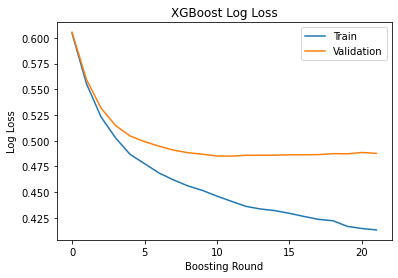

In [4]:
# plot evaluation evolution
pipeline.plot_evaluation(evals_result)

In [5]:
# display sampled predictions
predictions.sample(5)

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,Adopted,Adopted_prediction
4180,Cat,8,Siamese,Male,White,No Color,Medium,Short,No,No,Healthy,100,1,No,No
1408,Cat,2,Domestic Short Hair,Male,Yellow,White,Medium,Short,No,No,Healthy,0,4,Yes,Yes
6118,Dog,60,Mixed Breed,Female,Cream,No Color,Medium,Short,Yes,Yes,Minor Injury,0,1,No,No
3530,Dog,6,Mixed Breed,Male,Black,No Color,Medium,Short,Not Sure,Not Sure,Healthy,0,2,Yes,No
6684,Dog,24,Corgi,Female,Black,Brown,Small,Medium,Not Sure,Not Sure,Healthy,0,5,Yes,Yes


In [6]:
# run all test
import unittest
import sys
from tests.test_mlpipeline import *

suite = unittest.defaultTestLoader.loadTestsFromModule(sys.modules['tests.test_mlpipeline'])
unittest.TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.039s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>